<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/S6EVA6_MultipleNorms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Final Accuracy: 99.44**
###  Number of parameters - 7288

In [ ]:
!nvidia-smi

Thu Jun 10 17:14:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !pip install pytorch-ignite
!pip install torchsummary
!pip install wandb

# !pip install gradio
# !pip install netron
!pip install plotly --upgrade

     |████████████████████████████████| 1.8MB 14.9MB/s 
     |████████████████████████████████| 133kB 53.9MB/s 
     |████████████████████████████████| 174kB 56.9MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=754534d22a564ce47e605d44f24607cc7179b8f4dcebba04093a2a72da071e31
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=91873e9c5cf0ace76bf3ebe4a4d3fb9eb9471584dd400da3c37c32464e5510ef
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools
     |████████████████████████████████| 13.2MB 13.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfu

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (15, 10)

import pandas as pd
import plotly.express as px
pd.options.plotting.backend = "plotly"

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

import logging
logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

from argparse import ArgumentParser
from tqdm import tqdm
import os
import sys
import json
import glob

In [ ]:
import logging
logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

In [ ]:
!git clone https://github.com/rajy4683/mini-Rekog.git
sys.path.append("/content/mini-Rekog")

Cloning into 'mini-Rekog'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 29 (delta 6), reused 24 (delta 4), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [ ]:
import wandb
#wandb.init()
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext autoreload 
%autoreload 2
from miniRekog.models.MNISTModels import MNISTLayeredModel

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

### Final Model


### Model with Batch Normalization


In [ ]:
## BN
model = MNISTLayeredModel(dropout_val=0.1, norm_type='BN').to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
ActivatedConvBlock-4            [-1, 8, 28, 28]               0
           Dropout-5            [-1, 8, 28, 28]               0
            Conv2d-6            [-1, 8, 28, 28]             576
              ReLU-7            [-1, 8, 28, 28]               0
       BatchNorm2d-8            [-1, 8, 28, 28]              16
ActivatedConvBlock-9            [-1, 8, 28, 28]               0
          Dropout-10            [-1, 8, 28, 28]               0
        MaxPool2d-11            [-1, 8, 14, 14]               0
           Conv2d-12            [-1, 8, 14, 14]             576
             ReLU-13            [-1, 8, 14, 14]               0
      BatchNorm2d-14            [-1, 8,

### Model with Group Normalization

In [ ]:
model = MNISTLayeredModel(dropout_val=0.1, norm_type='GN', norm_groups=4).to(device)
summary(model, input_size=(1, 28, 28))
#model.eval()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
         GroupNorm-3            [-1, 8, 28, 28]              16
ActivatedConvBlock-4            [-1, 8, 28, 28]               0
           Dropout-5            [-1, 8, 28, 28]               0
            Conv2d-6            [-1, 8, 28, 28]             576
              ReLU-7            [-1, 8, 28, 28]               0
         GroupNorm-8            [-1, 8, 28, 28]              16
ActivatedConvBlock-9            [-1, 8, 28, 28]               0
          Dropout-10            [-1, 8, 28, 28]               0
        MaxPool2d-11            [-1, 8, 14, 14]               0
           Conv2d-12            [-1, 8, 14, 14]             576
             ReLU-13            [-1, 8, 14, 14]               0
        GroupNorm-14            [-1, 8,

### Model with Layer Normalization

In [ ]:
model = MNISTLayeredModel(dropout_val=0.1, norm_type='LN', norm_groups=1).to(device)
summary(model, input_size=(1, 28, 28))
#model.eval()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
         GroupNorm-3            [-1, 8, 28, 28]              16
ActivatedConvBlock-4            [-1, 8, 28, 28]               0
           Dropout-5            [-1, 8, 28, 28]               0
            Conv2d-6            [-1, 8, 28, 28]             576
              ReLU-7            [-1, 8, 28, 28]               0
         GroupNorm-8            [-1, 8, 28, 28]              16
ActivatedConvBlock-9            [-1, 8, 28, 28]               0
          Dropout-10            [-1, 8, 28, 28]               0
        MaxPool2d-11            [-1, 8, 14, 14]               0
           Conv2d-12            [-1, 8, 14, 14]             576
             ReLU-13            [-1, 8, 14, 14]               0
        GroupNorm-14            [-1, 8,

### Datasets and Basic Transforms

In [ ]:
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       #transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [ ]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
train_losses = []
test_losses = []
train_acc = []
test_acc = []

from tqdm import tqdm
def train(args, model, device, train_loader, optimizer, epoch_number, l1_loss=False, l1_beta = 0):
    model.train()
    pbar = tqdm(train_loader)
    train_loss = 0
    train_accuracy = 0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        train_accuracy += pred.eq(target.view_as(pred)).sum().item()

        loss = F.nll_loss(output, target)
        if l1_loss == True:
            l1_crit = nn.L1Loss(size_average=False)
            reg_loss = 0
            for param in model.parameters():
                target = torch.zeros_like(param)    
                reg_loss += l1_crit(param, target)
            loss += (l1_beta * reg_loss)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)
    print('\nEpoch: {:.0f} Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
        epoch_number, train_loss, train_accuracy, len(train_loader.dataset),
        100. * train_accuracy / len(train_loader.dataset)))
    train_accuracy = (100. * train_accuracy) / len(train_loader.dataset)
    train_acc.append(train_accuracy)
    train_losses.append(train_loss)

    return train_accuracy, train_loss

def test(args, model, device, test_loader,classes,epoch_number):
    model.eval()
    test_loss = 0
    correct = 0
    example_images = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
        #example_images.append(wandb.Image(
        #        data[0], caption="Pred: {} Truth: {}".format(classes[pred[0].item()], classes[target[0]])))

    test_loss /= len(test_loader.dataset)
    test_accuracy = (100. * correct) / len(test_loader.dataset)

    print('\nEpoch: {:.0f} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
        epoch_number, test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    test_acc.append(test_accuracy)
    test_losses.append(test_loss)

    return test_accuracy, test_loss

## Final Attempt

In [ ]:
from miniRekog.config.config import Config

config = Config(**hyperparameter_defaults)

### GN +L1

In [ ]:
from torch.optim.lr_scheduler import StepLR, OneCycleLR

hyperparameter_defaults = dict(
    dropout = 0.069,#0.07114420042272313,
    batch_size = 128,
    lr = 0.04104, #0.030455453938066226, #0.018,# 0.017530428914306426,
    momentum = 0.9, #0.8424379743502641,
    no_cuda = False,
    seed = 1,
    epochs = 25,
    bias = False,
    log_interval = 10,
    sched_lr_gamma = 0.09,
    sched_lr_step= 2,
    start_lr = 12,
    weight_decay=0,  #0.0006905824115205087 #5.740256897290758e-05, #1.8540436495464775e-06
    use_l1_loss = True,
    l1_decay = 0.0000001
    )

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
train_losses = []
test_losses = []
train_acc = []
test_acc = []

wandb.init(config=hyperparameter_defaults, project="news4eva4")
wandb.watch_called = False # Re-run the model without restarting the runtime, unnecessary after our next release
config = wandb.config

#config = Config(**hyperparameter_defaults)

def main():
    use_cuda = not config.no_cuda and torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    
    # Set random seeds and deterministic pytorch for reproducibility
    # random.seed(config.seed)       # python random seed
    torch.manual_seed(config.seed) # pytorch random seed
    # numpy.random.seed(config.seed) # numpy random seed
    torch.backends.cudnn.deterministic = True

    # Load the dataset: We're training our CNN on CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html)
    # First we define the tranformations to apply to our images
    #kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                        transform=train_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=test_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)

    # Initialize our model, recursively go over all modules and convert their parameters and buffers to CUDA tensors (if device is set to cuda)
    model = MNISTLayeredModel(dropout_val=config.dropout, norm_type='GN', norm_groups=4).to(device)
    optimizer = optim.SGD(model.parameters(), lr=config.lr,
                          momentum=config.momentum)
    
    scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)
    #scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=config.lr, steps_per_epoch=len(train_loader), epochs=10)
    # WandB – wandb.watch() automatically fetches all layer dimensions, gradients, model parameters and logs them automatically to your dashboard.
    # Using log="all" log histograms of parameter values in addition to gradients
    wandb.watch(model, log="all")

    for epoch in range(1, config.epochs + 1):
        epoch_train_acc,epoch_train_loss = train(config, model, device, train_loader, optimizer, epoch)        
        epoch_test_acc,epoch_test_loss = test(config, model, device, test_loader, classes,epoch)
        wandb.log({ "Train Accuracy": epoch_train_acc, 
                   "Train Loss": epoch_train_loss, 
                   "Test Accuracy":epoch_test_acc, 
                   "Test Loss": epoch_test_loss,
                   #"Learning Rate": config.lr})
                   "Learning Rate": scheduler.get_last_lr()})
        if(epoch > config.start_lr):
            scheduler.step()

        # wandb.log({ "Train Accuracy": epoch_train_acc, 
        #     "Train Loss": epoch_train_loss, 
        #     "Test Accuracy":epoch_test_acc, 
        #     "Test Loss": epoch_test_loss})
        
    # WandB – Save the model checkpoint. This automatically saves a file to the cloud and associates it with the current run.
    torch.save(model.state_dict(), "model.pth")
    wandb.save('model.pth')

if __name__ == '__main__':
    main()

Train Accuracy,98.82333
Train Loss,0.0003
Test Accuracy,99.24
Test Loss,0.02479
_runtime,380
_timestamp,1623347926
_step,24


Train Accuracy,▁▆▇▇▇████████████████████
Train Loss,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Test Accuracy,▁▅▆▆▆▇▇▇▇▇███████████████
Test Loss,█▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▆▆▆▇▇▇▇██
_timestamp,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▆▆▆▇▇▇▇██
_step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
loss=0.21826229989528656 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.43it/s]


Epoch: 1 Train set: Average loss: 0.0032, Accuracy: 52135/60000 (86.892%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 1 Test set: Average loss: 0.0728, Accuracy: 9772/10000 (97.720%)



loss=0.0676940456032753 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.56it/s]


Epoch: 2 Train set: Average loss: 0.0008, Accuracy: 58149/60000 (96.915%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 2 Test set: Average loss: 0.0431, Accuracy: 9858/10000 (98.580%)



loss=0.08330710232257843 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.33it/s]


Epoch: 3 Train set: Average loss: 0.0007, Accuracy: 58453/60000 (97.422%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 3 Test set: Average loss: 0.0356, Accuracy: 9875/10000 (98.750%)



loss=0.06427241116762161 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.18it/s]


Epoch: 4 Train set: Average loss: 0.0006, Accuracy: 58673/60000 (97.788%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 4 Test set: Average loss: 0.0367, Accuracy: 9884/10000 (98.840%)



loss=0.05388038977980614 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.22it/s]


Epoch: 5 Train set: Average loss: 0.0005, Accuracy: 58791/60000 (97.985%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 5 Test set: Average loss: 0.0301, Accuracy: 9894/10000 (98.940%)



loss=0.07495832443237305 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.59it/s]


Epoch: 6 Train set: Average loss: 0.0005, Accuracy: 58845/60000 (98.075%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 6 Test set: Average loss: 0.0269, Accuracy: 9906/10000 (99.060%)



loss=0.033510055392980576 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.80it/s]


Epoch: 7 Train set: Average loss: 0.0004, Accuracy: 58951/60000 (98.252%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 7 Test set: Average loss: 0.0312, Accuracy: 9888/10000 (98.880%)



loss=0.018811019137501717 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.11it/s]


Epoch: 8 Train set: Average loss: 0.0004, Accuracy: 59018/60000 (98.363%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 8 Test set: Average loss: 0.0263, Accuracy: 9907/10000 (99.070%)



loss=0.05275636538863182 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.24it/s]


Epoch: 9 Train set: Average loss: 0.0004, Accuracy: 59029/60000 (98.382%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 9 Test set: Average loss: 0.0241, Accuracy: 9908/10000 (99.080%)



loss=0.009184964001178741 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.85it/s]


Epoch: 10 Train set: Average loss: 0.0004, Accuracy: 59107/60000 (98.512%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 10 Test set: Average loss: 0.0248, Accuracy: 9914/10000 (99.140%)



loss=0.018769295886158943 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.13it/s]


Epoch: 11 Train set: Average loss: 0.0004, Accuracy: 59080/60000 (98.467%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 11 Test set: Average loss: 0.0238, Accuracy: 9920/10000 (99.200%)



loss=0.057999882847070694 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.67it/s]


Epoch: 12 Train set: Average loss: 0.0004, Accuracy: 59127/60000 (98.545%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 12 Test set: Average loss: 0.0307, Accuracy: 9899/10000 (98.990%)



loss=0.021213114261627197 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.03it/s]


Epoch: 13 Train set: Average loss: 0.0003, Accuracy: 59188/60000 (98.647%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 13 Test set: Average loss: 0.0231, Accuracy: 9911/10000 (99.110%)



loss=0.04010312631726265 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.90it/s]


Epoch: 14 Train set: Average loss: 0.0003, Accuracy: 59194/60000 (98.657%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 14 Test set: Average loss: 0.0237, Accuracy: 9920/10000 (99.200%)



loss=0.008014150895178318 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.24it/s]


Epoch: 15 Train set: Average loss: 0.0003, Accuracy: 59344/60000 (98.907%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 15 Test set: Average loss: 0.0182, Accuracy: 9928/10000 (99.280%)



loss=0.004807576537132263 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.94it/s]


Epoch: 16 Train set: Average loss: 0.0003, Accuracy: 59367/60000 (98.945%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 16 Test set: Average loss: 0.0184, Accuracy: 9935/10000 (99.350%)



loss=0.009038090705871582 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.89it/s]



Epoch: 17 Train set: Average loss: 0.0002, Accuracy: 59416/60000 (99.027%)



  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 17 Test set: Average loss: 0.0180, Accuracy: 9938/10000 (99.380%)



loss=0.06902461498975754 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.48it/s]


Epoch: 18 Train set: Average loss: 0.0003, Accuracy: 59402/60000 (99.003%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 18 Test set: Average loss: 0.0179, Accuracy: 9931/10000 (99.310%)



loss=0.09079482406377792 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.62it/s]


Epoch: 19 Train set: Average loss: 0.0002, Accuracy: 59445/60000 (99.075%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 19 Test set: Average loss: 0.0179, Accuracy: 9932/10000 (99.320%)



loss=0.008760805241763592 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 32.98it/s]


Epoch: 20 Train set: Average loss: 0.0002, Accuracy: 59414/60000 (99.023%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 20 Test set: Average loss: 0.0178, Accuracy: 9931/10000 (99.310%)



loss=0.015213538892567158 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.03it/s]


Epoch: 21 Train set: Average loss: 0.0002, Accuracy: 59416/60000 (99.027%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 21 Test set: Average loss: 0.0178, Accuracy: 9931/10000 (99.310%)



loss=0.03127814456820488 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.32it/s]


Epoch: 22 Train set: Average loss: 0.0002, Accuracy: 59415/60000 (99.025%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 22 Test set: Average loss: 0.0178, Accuracy: 9931/10000 (99.310%)



loss=0.01156271155923605 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.71it/s]


Epoch: 23 Train set: Average loss: 0.0002, Accuracy: 59432/60000 (99.053%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 23 Test set: Average loss: 0.0178, Accuracy: 9931/10000 (99.310%)



loss=0.034878116101026535 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.08it/s]


Epoch: 24 Train set: Average loss: 0.0002, Accuracy: 59441/60000 (99.068%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 24 Test set: Average loss: 0.0178, Accuracy: 9931/10000 (99.310%)



loss=0.05230134725570679 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.87it/s]


Epoch: 25 Train set: Average loss: 0.0002, Accuracy: 59421/60000 (99.035%)




Epoch: 25 Test set: Average loss: 0.0178, Accuracy: 9931/10000 (99.310%)



### BN+L1+L2

In [ ]:
from torch.optim.lr_scheduler import StepLR, OneCycleLR

hyperparameter_defaults = dict(
    dropout = 0.069,#0.07114420042272313,
    batch_size = 128,
    lr = 0.04104, #0.030455453938066226, #0.018,# 0.017530428914306426,
    momentum = 0.9, #0.8424379743502641,
    no_cuda = False,
    seed = 1,
    epochs = 25,
    bias = False,
    log_interval = 10,
    sched_lr_gamma = 0.09,
    sched_lr_step= 2,
    start_lr = 12,
    weight_decay=0.000004,  #0.0006905824115205087 #5.740256897290758e-05, #1.8540436495464775e-06
    use_l1_loss = True,
    l1_decay = 0.00001
    )

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
train_losses = []
test_losses = []
train_acc = []
test_acc = []

wandb.init(config=hyperparameter_defaults, project="news4eva4")
wandb.watch_called = False # Re-run the model without restarting the runtime, unnecessary after our next release
config = wandb.config



def main():
    use_cuda = not config.no_cuda and torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    
    # Set random seeds and deterministic pytorch for reproducibility
    # random.seed(config.seed)       # python random seed
    torch.manual_seed(config.seed) # pytorch random seed
    # numpy.random.seed(config.seed) # numpy random seed
    torch.backends.cudnn.deterministic = True

    # Load the dataset: We're training our CNN on CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html)
    # First we define the tranformations to apply to our images
    #kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                        transform=train_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=test_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)

    # Initialize our model, recursively go over all modules and convert their parameters and buffers to CUDA tensors (if device is set to cuda)
    model = MNISTLayeredModel(dropout_val=config.dropout, norm_type='BN').to(device)
    optimizer = optim.SGD(model.parameters(), lr=config.lr,
                          momentum=config.momentum)
    
    scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)
    #scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=config.lr, steps_per_epoch=len(train_loader), epochs=10)
    # WandB – wandb.watch() automatically fetches all layer dimensions, gradients, model parameters and logs them automatically to your dashboard.
    # Using log="all" log histograms of parameter values in addition to gradients
    wandb.watch(model, log="all")

    for epoch in range(1, config.epochs + 1):
        epoch_train_acc,epoch_train_loss = train(config, model, device, train_loader, optimizer, epoch)        
        epoch_test_acc,epoch_test_loss = test(config, model, device, test_loader, classes,epoch)
        wandb.log({ "Train Accuracy": epoch_train_acc, 
                   "Train Loss": epoch_train_loss, 
                   "Test Accuracy":epoch_test_acc, 
                   "Test Loss": epoch_test_loss,
                   #"Learning Rate": config.lr})
                   "Learning Rate": scheduler.get_last_lr()})
        if(epoch > config.start_lr):
            scheduler.step()

        # wandb.log({ "Train Accuracy": epoch_train_acc, 
        #     "Train Loss": epoch_train_loss, 
        #     "Test Accuracy":epoch_test_acc, 
        #     "Test Loss": epoch_test_loss})
        
    # WandB – Save the model checkpoint. This automatically saves a file to the cloud and associates it with the current run.
    torch.save(model.state_dict(), "model_bn_l1_l2.pth")
    wandb.save('model_bn_l1_l2.pth')

if __name__ == '__main__':
    main()

Train Accuracy,99.035
Train Loss,0.00024
Test Accuracy,99.31
Test Loss,0.01783
_runtime,383
_timestamp,1623348440
_step,24


Train Accuracy,▁▇▇▇▇▇███████████████████
Train Loss,█▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Test Accuracy,▁▅▅▆▆▇▆▇▇▇▇▆▇▇███████████
Test Loss,█▄▃▃▃▂▃▂▂▂▂▃▂▂▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▆▆▆▇▇▇▇██
_timestamp,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▆▆▆▇▇▇▇██
_step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
loss=0.11184925585985184 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.41it/s]


Epoch: 1 Train set: Average loss: 0.0020, Accuracy: 55282/60000 (92.137%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 1 Test set: Average loss: 0.0862, Accuracy: 9735/10000 (97.350%)



loss=0.04670161381363869 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.13it/s]



Epoch: 2 Train set: Average loss: 0.0007, Accuracy: 58468/60000 (97.447%)



  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 2 Test set: Average loss: 0.0466, Accuracy: 9845/10000 (98.450%)



loss=0.0616733692586422 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.52it/s]


Epoch: 3 Train set: Average loss: 0.0005, Accuracy: 58784/60000 (97.973%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 3 Test set: Average loss: 0.0321, Accuracy: 9890/10000 (98.900%)



loss=0.024705924093723297 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.99it/s]


Epoch: 4 Train set: Average loss: 0.0004, Accuracy: 58896/60000 (98.160%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 4 Test set: Average loss: 0.0358, Accuracy: 9886/10000 (98.860%)



loss=0.03985912725329399 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.77it/s]


Epoch: 5 Train set: Average loss: 0.0004, Accuracy: 59024/60000 (98.373%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 5 Test set: Average loss: 0.0260, Accuracy: 9911/10000 (99.110%)



loss=0.06415580213069916 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.70it/s]


Epoch: 6 Train set: Average loss: 0.0004, Accuracy: 59092/60000 (98.487%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 6 Test set: Average loss: 0.0260, Accuracy: 9914/10000 (99.140%)



loss=0.02850225381553173 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.07it/s]


Epoch: 7 Train set: Average loss: 0.0004, Accuracy: 59124/60000 (98.540%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 7 Test set: Average loss: 0.0281, Accuracy: 9905/10000 (99.050%)



loss=0.054109882563352585 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 32.77it/s]


Epoch: 8 Train set: Average loss: 0.0003, Accuracy: 59210/60000 (98.683%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 8 Test set: Average loss: 0.0260, Accuracy: 9914/10000 (99.140%)



loss=0.0673924908041954 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 31.53it/s]


Epoch: 9 Train set: Average loss: 0.0003, Accuracy: 59199/60000 (98.665%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 9 Test set: Average loss: 0.0229, Accuracy: 9919/10000 (99.190%)



loss=0.006068715360015631 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 32.71it/s]


Epoch: 10 Train set: Average loss: 0.0003, Accuracy: 59200/60000 (98.667%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 10 Test set: Average loss: 0.0274, Accuracy: 9911/10000 (99.110%)



loss=0.00970628671348095 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 31.16it/s]


Epoch: 11 Train set: Average loss: 0.0003, Accuracy: 59231/60000 (98.718%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 11 Test set: Average loss: 0.0295, Accuracy: 9912/10000 (99.120%)



loss=0.0049475268460810184 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 32.07it/s]


Epoch: 12 Train set: Average loss: 0.0003, Accuracy: 59270/60000 (98.783%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 12 Test set: Average loss: 0.0267, Accuracy: 9915/10000 (99.150%)



loss=0.029223432764410973 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 32.91it/s]


Epoch: 13 Train set: Average loss: 0.0003, Accuracy: 59323/60000 (98.872%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 13 Test set: Average loss: 0.0225, Accuracy: 9929/10000 (99.290%)



loss=0.03481937572360039 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 32.21it/s]


Epoch: 14 Train set: Average loss: 0.0003, Accuracy: 59347/60000 (98.912%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 14 Test set: Average loss: 0.0225, Accuracy: 9929/10000 (99.290%)



loss=0.041132766753435135 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.95it/s]


Epoch: 15 Train set: Average loss: 0.0002, Accuracy: 59414/60000 (99.023%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 15 Test set: Average loss: 0.0207, Accuracy: 9929/10000 (99.290%)



loss=0.006683446932584047 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.52it/s]


Epoch: 16 Train set: Average loss: 0.0002, Accuracy: 59446/60000 (99.077%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 16 Test set: Average loss: 0.0193, Accuracy: 9934/10000 (99.340%)



loss=0.005901740863919258 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.75it/s]


Epoch: 17 Train set: Average loss: 0.0002, Accuracy: 59506/60000 (99.177%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 17 Test set: Average loss: 0.0192, Accuracy: 9935/10000 (99.350%)



loss=0.06707050651311874 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.41it/s]


Epoch: 18 Train set: Average loss: 0.0002, Accuracy: 59458/60000 (99.097%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 18 Test set: Average loss: 0.0190, Accuracy: 9936/10000 (99.360%)



loss=0.04335564374923706 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.91it/s]


Epoch: 19 Train set: Average loss: 0.0002, Accuracy: 59511/60000 (99.185%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 19 Test set: Average loss: 0.0194, Accuracy: 9934/10000 (99.340%)



loss=0.0037830111104995012 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.75it/s]


Epoch: 20 Train set: Average loss: 0.0002, Accuracy: 59512/60000 (99.187%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 20 Test set: Average loss: 0.0192, Accuracy: 9936/10000 (99.360%)



loss=0.02053890936076641 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.83it/s]


Epoch: 21 Train set: Average loss: 0.0002, Accuracy: 59510/60000 (99.183%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 21 Test set: Average loss: 0.0199, Accuracy: 9930/10000 (99.300%)



loss=0.07412312179803848 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.55it/s]


Epoch: 22 Train set: Average loss: 0.0002, Accuracy: 59504/60000 (99.173%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 22 Test set: Average loss: 0.0193, Accuracy: 9934/10000 (99.340%)



loss=0.005544626619666815 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.80it/s]


Epoch: 23 Train set: Average loss: 0.0002, Accuracy: 59496/60000 (99.160%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 23 Test set: Average loss: 0.0193, Accuracy: 9936/10000 (99.360%)



loss=0.0842105969786644 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.82it/s]


Epoch: 24 Train set: Average loss: 0.0002, Accuracy: 59510/60000 (99.183%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 24 Test set: Average loss: 0.0195, Accuracy: 9936/10000 (99.360%)



loss=0.08233679085969925 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.04it/s]


Epoch: 25 Train set: Average loss: 0.0002, Accuracy: 59497/60000 (99.162%)




Epoch: 25 Test set: Average loss: 0.0193, Accuracy: 9935/10000 (99.350%)



### LN + L2

In [ ]:
from torch.optim.lr_scheduler import StepLR, OneCycleLR

hyperparameter_defaults = dict(
    dropout = 0.069,#0.07114420042272313,
    batch_size = 128,
    lr = 0.04104, #0.030455453938066226, #0.018,# 0.017530428914306426,
    momentum = 0.9, #0.8424379743502641,
    no_cuda = False,
    seed = 1,
    epochs = 25,
    bias = False,
    log_interval = 10,
    sched_lr_gamma = 0.09,
    sched_lr_step= 2,
    start_lr = 12,
    weight_decay=0.00002,  #0.0006905824115205087 #5.740256897290758e-05, #1.8540436495464775e-06
    use_l1_loss = False,
    l1_decay = 0.00001
    )

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
train_losses = []
test_losses = []
train_acc = []
test_acc = []

wandb.init(config=hyperparameter_defaults, project="news4eva4")
wandb.watch_called = False # Re-run the model without restarting the runtime, unnecessary after our next release
config = wandb.config



def main():
    use_cuda = not config.no_cuda and torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    
    # Set random seeds and deterministic pytorch for reproducibility
    # random.seed(config.seed)       # python random seed
    torch.manual_seed(config.seed) # pytorch random seed
    # numpy.random.seed(config.seed) # numpy random seed
    torch.backends.cudnn.deterministic = True

    # Load the dataset: We're training our CNN on CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html)
    # First we define the tranformations to apply to our images
    #kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                        transform=train_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=test_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)

    # Initialize our model, recursively go over all modules and convert their parameters and buffers to CUDA tensors (if device is set to cuda)
    model = MNISTLayeredModel(dropout_val=config.dropout, norm_type='LN', norm_groups=1).to(device)
    optimizer = optim.SGD(model.parameters(), lr=config.lr,
                          momentum=config.momentum)
    
    scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)
    #scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=config.lr, steps_per_epoch=len(train_loader), epochs=10)
    # WandB – wandb.watch() automatically fetches all layer dimensions, gradients, model parameters and logs them automatically to your dashboard.
    # Using log="all" log histograms of parameter values in addition to gradients
    wandb.watch(model, log="all")

    for epoch in range(1, config.epochs + 1):
        epoch_train_acc,epoch_train_loss = train(config, model, device, train_loader, optimizer, epoch)        
        epoch_test_acc,epoch_test_loss = test(config, model, device, test_loader, classes,epoch)
        wandb.log({ "Train Accuracy": epoch_train_acc, 
                   "Train Loss": epoch_train_loss, 
                   "Test Accuracy":epoch_test_acc, 
                   "Test Loss": epoch_test_loss,
                   #"Learning Rate": config.lr})
                   "Learning Rate": scheduler.get_last_lr()})
        if(epoch > config.start_lr):
            scheduler.step()

        # wandb.log({ "Train Accuracy": epoch_train_acc, 
        #     "Train Loss": epoch_train_loss, 
        #     "Test Accuracy":epoch_test_acc, 
        #     "Test Loss": epoch_test_loss})
        
    # WandB – Save the model checkpoint. This automatically saves a file to the cloud and associates it with the current run.
    torch.save(model.state_dict(), "model_ln_l2.pth")
    wandb.save('model_ln_l2.pth')

if __name__ == '__main__':
    main()

Train Accuracy,99.16167
Train Loss,0.00021
Test Accuracy,99.35
Test Loss,0.01931
_runtime,389
_timestamp,1623348833
_step,24


Train Accuracy,▁▆▇▇▇▇▇█▇▇███████████████
Train Loss,█▃▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Test Accuracy,▁▅▆▆▇▇▇▇▇▇▇▇█████████████
Test Loss,█▄▂▃▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
_runtime,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
_timestamp,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
_step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
loss=0.16271188855171204 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.18it/s]


Epoch: 1 Train set: Average loss: 0.0039, Accuracy: 50253/60000 (83.755%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 1 Test set: Average loss: 0.1304, Accuracy: 9576/10000 (95.760%)



loss=0.0841306671500206 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.87it/s]


Epoch: 2 Train set: Average loss: 0.0011, Accuracy: 57358/60000 (95.597%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 2 Test set: Average loss: 0.0739, Accuracy: 9778/10000 (97.780%)



loss=0.10660109668970108 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.54it/s]


Epoch: 3 Train set: Average loss: 0.0008, Accuracy: 57982/60000 (96.637%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 3 Test set: Average loss: 0.0556, Accuracy: 9819/10000 (98.190%)



loss=0.09076102823019028 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.14it/s]


Epoch: 4 Train set: Average loss: 0.0007, Accuracy: 58330/60000 (97.217%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 4 Test set: Average loss: 0.0538, Accuracy: 9831/10000 (98.310%)



loss=0.1297588050365448 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.05it/s]


Epoch: 5 Train set: Average loss: 0.0006, Accuracy: 58595/60000 (97.658%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 5 Test set: Average loss: 0.0541, Accuracy: 9830/10000 (98.300%)



loss=0.09168189764022827 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.52it/s]


Epoch: 6 Train set: Average loss: 0.0006, Accuracy: 58674/60000 (97.790%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 6 Test set: Average loss: 0.0365, Accuracy: 9885/10000 (98.850%)



loss=0.033029597252607346 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.22it/s]


Epoch: 7 Train set: Average loss: 0.0005, Accuracy: 58733/60000 (97.888%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 7 Test set: Average loss: 0.0419, Accuracy: 9864/10000 (98.640%)



loss=0.050419118255376816 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.57it/s]


Epoch: 8 Train set: Average loss: 0.0005, Accuracy: 58902/60000 (98.170%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 8 Test set: Average loss: 0.0337, Accuracy: 9893/10000 (98.930%)



loss=0.03324921801686287 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.62it/s]


Epoch: 9 Train set: Average loss: 0.0005, Accuracy: 58925/60000 (98.208%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 9 Test set: Average loss: 0.0357, Accuracy: 9881/10000 (98.810%)



loss=0.027934284880757332 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.70it/s]


Epoch: 10 Train set: Average loss: 0.0004, Accuracy: 58957/60000 (98.262%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 10 Test set: Average loss: 0.0364, Accuracy: 9881/10000 (98.810%)



loss=0.03340409696102142 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.14it/s]


Epoch: 11 Train set: Average loss: 0.0004, Accuracy: 59016/60000 (98.360%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 11 Test set: Average loss: 0.0317, Accuracy: 9902/10000 (99.020%)



loss=0.02723972499370575 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.25it/s]


Epoch: 12 Train set: Average loss: 0.0004, Accuracy: 59027/60000 (98.378%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 12 Test set: Average loss: 0.0300, Accuracy: 9905/10000 (99.050%)



loss=0.02181386761367321 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.10it/s]


Epoch: 13 Train set: Average loss: 0.0004, Accuracy: 59069/60000 (98.448%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 13 Test set: Average loss: 0.0285, Accuracy: 9914/10000 (99.140%)



loss=0.043722063302993774 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.87it/s]


Epoch: 14 Train set: Average loss: 0.0004, Accuracy: 59122/60000 (98.537%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 14 Test set: Average loss: 0.0247, Accuracy: 9923/10000 (99.230%)



loss=0.09780216962099075 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.85it/s]



Epoch: 15 Train set: Average loss: 0.0003, Accuracy: 59270/60000 (98.783%)



  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 15 Test set: Average loss: 0.0203, Accuracy: 9937/10000 (99.370%)



loss=0.01571519859135151 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.22it/s]


Epoch: 16 Train set: Average loss: 0.0003, Accuracy: 59315/60000 (98.858%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 16 Test set: Average loss: 0.0203, Accuracy: 9937/10000 (99.370%)



loss=0.011509813368320465 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.65it/s]


Epoch: 17 Train set: Average loss: 0.0003, Accuracy: 59376/60000 (98.960%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 17 Test set: Average loss: 0.0198, Accuracy: 9938/10000 (99.380%)



loss=0.056506264954805374 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.65it/s]


Epoch: 18 Train set: Average loss: 0.0003, Accuracy: 59340/60000 (98.900%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 18 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



loss=0.09669116884469986 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.68it/s]


Epoch: 19 Train set: Average loss: 0.0003, Accuracy: 59388/60000 (98.980%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 19 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



loss=0.003982089925557375 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 34.16it/s]


Epoch: 20 Train set: Average loss: 0.0003, Accuracy: 59356/60000 (98.927%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 20 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



loss=0.013926937244832516 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.50it/s]


Epoch: 21 Train set: Average loss: 0.0003, Accuracy: 59386/60000 (98.977%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 21 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



loss=0.06756163388490677 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.38it/s]


Epoch: 22 Train set: Average loss: 0.0003, Accuracy: 59390/60000 (98.983%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 22 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



loss=0.007373981177806854 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 32.87it/s]


Epoch: 23 Train set: Average loss: 0.0003, Accuracy: 59344/60000 (98.907%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 23 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



loss=0.01960568316280842 batch_id=468: 100%|██████████| 469/469 [00:13<00:00, 33.88it/s]


Epoch: 24 Train set: Average loss: 0.0003, Accuracy: 59360/60000 (98.933%)




  0%|          | 0/469 [00:00<?, ?it/s]


Epoch: 24 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



loss=0.0601947195827961 batch_id=468: 100%|██████████| 469/469 [00:14<00:00, 33.32it/s]


Epoch: 25 Train set: Average loss: 0.0003, Accuracy: 59380/60000 (98.967%)




Epoch: 25 Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.390%)



## RESULTS of the Final Run

In [ ]:
def plot_metrics(metrics_dataframe_local):
    # dataset_metrics = metrics_dataframe_local.loc[:,['Test Accuracy', 'Test Loss']].dropna().reset_index().drop(columns='index')
    final_run_metrics = pd.concat([metrics_dataframe_local.loc[:,['Train Accuracy', 'Train Loss']].dropna().reset_index().drop(columns='index'), 
                                   metrics_dataframe_local.loc[:,['Test Accuracy', 'Test Loss']].dropna().reset_index().drop(columns='index')],axis=1)
    return final_run_metrics
    # final_run_metrics.loc[:,['Train Accuracy', 'Test Accuracy']].plot()
    # final_run_metrics.loc[:,['Train Loss', 'Test Loss']].plot()


In [ ]:
import wandb
api = wandb.Api()

# run is specified by <entity>/<project>/<run id>
# run_list = ['wobbly-dawn-602','curious-night-601','peach-blaze-600' ]

# run_map = {'wobbly-dawn-602':'LN_L2','curious-night-601':'BN_L1_L2','peach-blaze-600':'GN_L1' }
run_map = {'electric-puddle-615':'LN_L2','iconic-brook-614':'BN_L1_L2','jolly-dream-613':'GN_L1' }

final_df = pd.DataFrame()
runs = api.runs('rajy4683/news4eva4')

for itr in runs:
    if itr.name in list(run_map.keys()):
        run =itr
        metrics_dataframe = plot_metrics(run.history())
        metrics_dataframe = metrics_dataframe.rename({ k: run_map[itr.name]+' '+k for k in metrics_dataframe.columns }, axis=1)
        final_df = pd.concat([final_df, metrics_dataframe], axis=1)
        
        #final_df =  
        #metrics_dataframe.to_csv("metrics.csv")

# save the metrics for the run to a csv file
# metrics_dataframe = run.history()
# metrics_dataframe.to_csv("metrics.csv")

In [ ]:
final_df

,LN_L2 Train Accuracy,LN_L2 Train Loss,LN_L2 Test Accuracy,LN_L2 Test Loss,BN_L1_L2 Train Accuracy,BN_L1_L2 Train Loss,BN_L1_L2 Test Accuracy,BN_L1_L2 Test Loss,GN_L1 Train Accuracy,GN_L1 Train Loss,GN_L1 Test Accuracy,GN_L1 Test Loss
0,83.755000,0.003900,95.76,0.130428,92.136667,0.002027,97.35,0.086222,86.891667,0.003215,97.72,0.072783
1,95.596667,0.001118,97.78,0.073887,97.446667,0.000655,98.45,0.046597,96.915000,0.000803,98.58,0.043073
2,96.636667,0.000833,98.19,0.055561,97.973333,0.000518,98.90,0.032108,97.421667,0.000655,98.75,0.035574
3,97.216667,0.000691,98.31,0.053835,98.160000,0.000449,98.86,0.035765,97.788333,0.000578,98.84,0.036665
4,97.658333,0.000585,98.30,0.054127,98.373333,0.000412,99.11,0.025976,97.985000,0.000505,98.94,0.030107
5,97.790000,0.000552,98.85,0.036461,98.486667,0.000372,99.14,0.026030,98.075000,0.000482,99.06,0.026903
6,97.888333,0.000524,98.64,0.041908,98.540000,0.000352,99.05,0.028077,98.251667,0.000441,98.88,0.031183
7,98.170000,0.000463,98.93,0.033740,98.683333,0.000329,99.14,0.025970,98.363333,0.000411,99.07,0.026301
8,98.208333,0.000454,98.81,0.035684,98.665000,0.000335,99.19,0.022877,98.381667,0.000408,99.08,0.024125
9,98.261667,0.000424,98.81,0.036405,98.666667,0.000336,99.11,0.027391,98.511667,0.000369,99.14,0.024779


In [ ]:
final_df[[ x for x in final_df.columns if 'Test Accuracy' in x]].plot(title='Test Accuracy')

In [ ]:
final_df[[ x for x in final_df.columns if 'Test Loss' in x]].plot(title='Test Loss')

In [ ]:
final_df[[ x for x in final_df.columns if 'Train Accuracy' in x]].plot(title='Train Accuracy')

In [ ]:
final_df[[ x for x in final_df.columns if 'Train Loss' in x]].plot(title='Train Loss')

## Plotting misclassified images

In [44]:
from miniRekog.utils.fileutils import plot_misclassified

In [30]:
kwargs_2 = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
train_loader_2 = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=train_transforms),
    batch_size=config.batch_size, shuffle=True, **kwargs_2)
test_loader_2 = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=test_transforms),
        batch_size=config.batch_size, shuffle=False, **kwargs_2)

len(train_loader_2),len(test_loader_2)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



(469, 79)

In [33]:
BN_L1_L2_model = "/content/model_bn_l1_l2.pth"
GN_L1_model = "/content/model_gn_l1.pth"
LN_L2_model = "/content/model_ln_l2.pth"

### Model Type: Layer Normalized + L2 losses

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



61
(61,)
99.39 0.019468272082926705


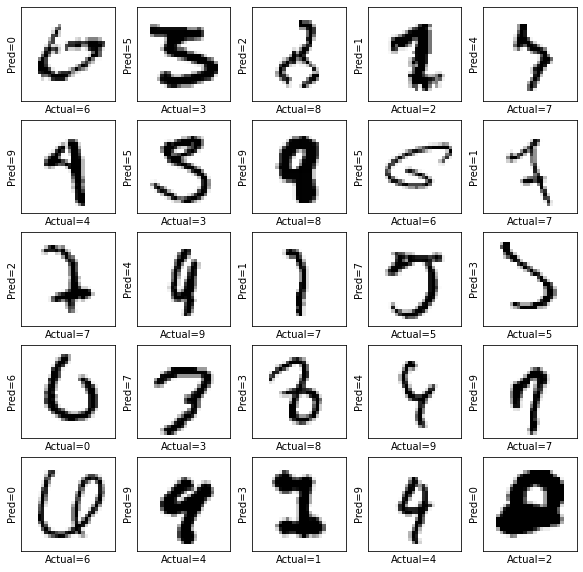

In [45]:
# type(my_model)
# model = MNISTLayeredModel(dropout_val=0.069, norm_type='LN', norm_groups=1).to(device)
# model = model.load_state_dict
model = MNISTLayeredModel(dropout_val=0.069, norm_type='LN', norm_groups=1).to(device)

model.load_state_dict(torch.load(LN_L2_model))
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
epoch_test_acc,epoch_test_loss,preds = plot_misclassified(config, model, device, test_loader_2, classes,1)
print(epoch_test_acc,epoch_test_loss)

### Model Type: Batch Normalized + L1 + L2 losses

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



65
(65,)
99.35 0.019305262367625257


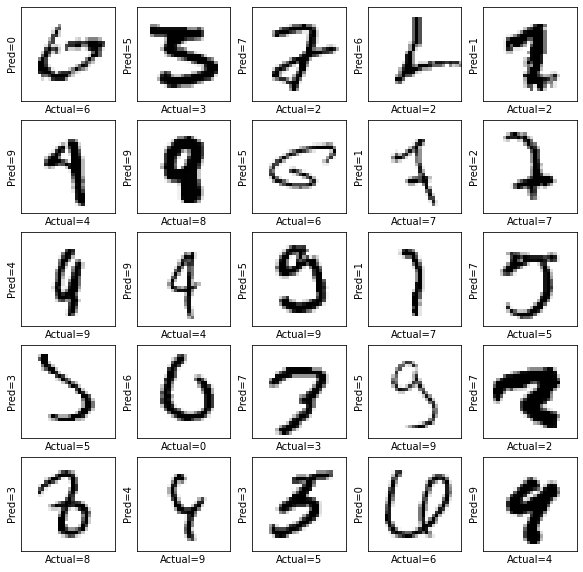

In [41]:
# model = MNISTLayeredModel(dropout_val=0.069, norm_type='LN', norm_groups=1).to(device)
model = MNISTLayeredModel(dropout_val=config.dropout, norm_type='BN').to(device)
model.load_state_dict(torch.load(BN_L1_L2_model))
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
epoch_test_acc,epoch_test_loss,preds = plot_misclassified(config, model, device, test_loader_2, classes,1)
print(epoch_test_acc,epoch_test_loss)

### Model Type: Group Normalized with L1 loss

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



69
(69,)
99.31 0.017828772424533963


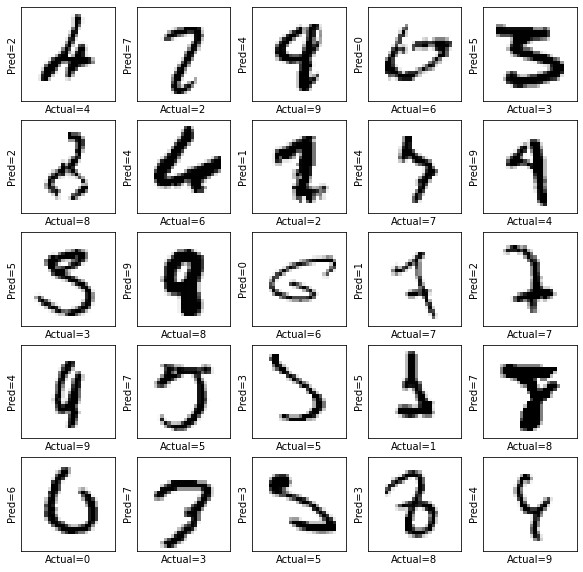

In [43]:
model = MNISTLayeredModel(dropout_val=config.dropout, norm_type='GN', norm_groups=4).to(device)
model.load_state_dict(torch.load(GN_L1_model))
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
epoch_test_acc,epoch_test_loss,preds = plot_misclassified(config, model, device, test_loader_2, classes,1)
print(epoch_test_acc,epoch_test_loss)